<a href="https://colab.research.google.com/github/fatemakotha/Data-Science/blob/main/53_54_(_loc_iloc_crosstab_groupby_lingraph_hist_convObjToInt_lower)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
 import pandas as pd
 car_sales = pd.read_csv("car-sales.csv")

##**Viewing and Selecting data:**

In [149]:
car_sales.head(7) #shows top 7

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"


In [150]:
car_sales.tail(3) #shows bottom 3

,Make,Colour,Odometer (KM),Doors,Price
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


##**.loc & .iloc**

### *.loc refers to the index numbers*

In [151]:
animals = pd.Series(["cat", "dog", "bird", "panda", "snake"], index=[0, 3, 9, 8, 3])

In [152]:
animals #you can see now that the index has been changed

0      cat
3      dog
9     bird
8    panda
3    snake
dtype: object

In [153]:
animals.loc[3] #at index 3

3      dog
3    snake
dtype: object

In [154]:
animals.loc[9] #at index 9

'bird'

In [155]:
#Lets try the .loc on car_sales:
car_sales.loc[3] #shows the entry at location index 3

Make                    BMW
Colour                Black
Odometer (KM)         11179
Doors                     5
Price            $22,000.00
Name: 3, dtype: object

### *.iloc refers to the position*

In [156]:
animals

0      cat
3      dog
9     bird
8    panda
3    snake
dtype: object

In [157]:
animals.iloc[3] #gives "panda" as that is in position 3

'panda'

In [158]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [159]:
car_sales.iloc[3]

Make                    BMW
Colour                Black
Odometer (KM)         11179
Doors                     5
Price            $22,000.00
Name: 3, dtype: object

In [160]:
animals.iloc[:3] #gives us the items in animals upto position 3

0     cat
3     dog
9    bird
dtype: object

In [161]:
#animals doe not have a 3 index, so it gives us upto 2 index
#so the following code with .loc will give an error
# animals.iloc[:3]

In [162]:
car_sales.iloc[:3]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"


In [163]:
car_sales.loc[:3]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"


**Tap into a column

In [164]:
car_sales["Make"] #taps into the make column

0    Toyota
1     Honda
2    Toyota
3       BMW
4    Nissan
5    Toyota
6     Honda
7     Honda
8    Toyota
9    Nissan
Name: Make, dtype: object

In [165]:
 car_sales.Make #taps into the make column

0    Toyota
1     Honda
2    Toyota
3       BMW
4    Nissan
5    Toyota
6     Honda
7     Honda
8    Toyota
9    Nissan
Name: Make, dtype: object

###*But if your column name has a space in it, the dot notation will not work*

In [166]:
car_sales.Odometer (KM)

AttributeError: ignored

In [167]:
car_sales["Odometer (KM)"]

0    150043
1     87899
2     32549
3     11179
4    213095
5     99213
6     45698
7     54738
8     60000
9     31600
Name: Odometer (KM), dtype: int64

##**Tapping into specific rows:**

In [168]:
#We only want rows with the car named toyota, by passing a condition:
car_sales[car_sales["Make"] == "Toyota"]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
5,Toyota,Green,99213,4,"$4,500.00"
8,Toyota,White,60000,4,"$6,250.00"


In [169]:
#We only want rows with the "Odometer (KM)" > 100000 , by passing a condition:
car_sales[car_sales["Odometer (KM)"] > 100000]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
4,Nissan,White,213095,4,"$3,500.00"


###**COMPARE 2 columns:**

In [170]:
pd.crosstab(car_sales["Make"], car_sales["Doors"])

Doors,3,4,5
Make,,,
BMW,0,0,1
Honda,0,3,0
Nissan,0,2,0
Toyota,1,3,0


In [171]:
pd.crosstab(car_sales["Doors"], car_sales["Make"])

Make,BMW,Honda,Nissan,Toyota
Doors,,,,
3,0,0,0,1
4,0,3,2,3
5,1,0,0,0


##**COMPARE more than 2 columns:**

***.groupby***

In [172]:
car_sales.groupby(["Make"]).mean()

,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


In [173]:
car_sales.groupby(["Doors"]).mean()

,Odometer (KM)
Doors,
3,32549.00
4,92785.75
5,11179.00


In [174]:
car_sales.groupby(["Doors"]).sum()

,Odometer (KM)
Doors,
3,32549
4,742286
5,11179


In [175]:
car_sales.groupby(["Odometer (KM)"]).mean()

,Doors
Odometer (KM),
11179,5.0
31600,4.0
32549,3.0
45698,4.0
54738,4.0
60000,4.0
87899,4.0
99213,4.0
150043,4.0


In [176]:
car_sales.groupby(["Odometer (KM)"]).sum()

,Doors
Odometer (KM),
11179,5
31600,4
32549,3
45698,4
54738,4
60000,4
87899,4
99213,4
150043,4


In [177]:
car_sales.groupby(["Colour"]).mean()

,Odometer (KM),Doors
Colour,,
Black,11179.000000,5.000000
Blue,44328.333333,3.666667
Green,99213.000000,4.000000
Red,87899.000000,4.000000
White,113684.500000,4.000000


In [178]:
car_sales.groupby(["Colour"]).sum()

,Odometer (KM),Doors
Colour,,
Black,11179,5
Blue,132985,11
Green,99213,4
Red,87899,4
White,454738,16


##***Use .groupby for ONLY White Toyotas: ***

In [179]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [180]:
 car_sales.groupby(car_sales["Colour"] == "White").sum()
 #False is 24 because those are non white cars
 #True is 16 because these are all white cars

,Odometer (KM),Doors
Colour,,
False,331276,24
True,454738,16


##**Plotting a Line graph:**

###**The line plot can only plot the numerical values i.e. "Odometer (KM)" and "Doors"**

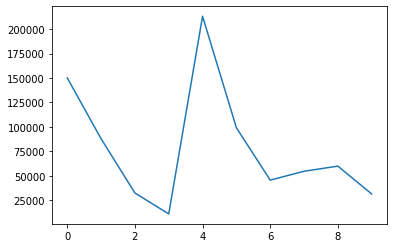

In [181]:
car_sales["Odometer (KM)"].plot()

In [184]:
car_sales["Make"].plot() #The line plot can only plot the numerical values i.e. "Odometer (KM)" and "Doors

TypeError: ignored

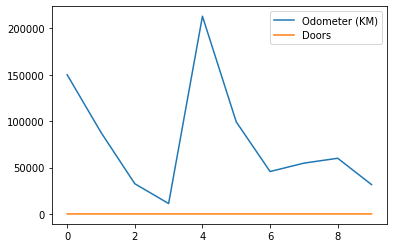

In [185]:
#Condas initiates the two lines of code below, but if not, type them manually:
%matplotlib inline
import matplotlib.pyplot as plt
car_sales.plot()

In [186]:
car_sales["Price"].plot() #says: TypeError: no numeric data to plot
#This is because the prices are objects in this dataframe and not numerical values !!! 

TypeError: ignored

##**Convert the "Price" column from object to int:**

In [187]:
#The line of code below tells to keep the values same, but access the string and replace the "$"dollar and ","commas and "."dots, with ""noting:
car_sales["Price"] = car_sales["Price"].str.replace("[\$\,\.]", "").astype(int)

<ipython-input-187-30d6720769e2>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales["Price"] = car_sales["Price"].str.replace("[\$\,\.]", "").astype(int)


In [188]:
car_sales["Price"].dtype #Check if the "Price" has been converted from object to int

dtype('int64')

In [189]:
car_sales.head(3)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000


###**The convertion worked but the .00 became 00, That is a PROBLEM !!**

In [145]:
#The line of code below tells to keep the values same, but access the string and replace the "$"dollar and ","commas and "."dots, with ""noting:
import numpy as np
car_sales['Price'] = car_sales['Price'].astype(str).str[:-2].astype(np.int64)

In [146]:
car_sales.head(3)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000


##**Plotting a Histogram:**

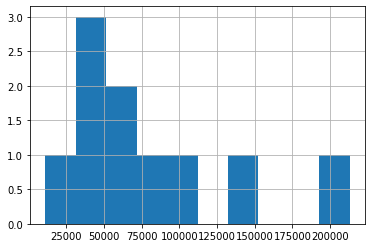

In [80]:
car_sales["Odometer (KM)"].hist()

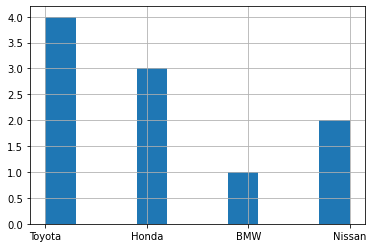

In [84]:
car_sales["Make"].hist() #The histogram plot can plot without the numerical values i.e. "Make"

##**Manipulating the data:**

### .lower()

In [191]:
#Anything you can to in strings in python, you can do on string columns in pandas!
car_sales["Make"].str.lower()

0    toyota
1     honda
2    toyota
3       bmw
4    nissan
5    toyota
6     honda
7     honda
8    toyota
9    nissan
Name: Make, dtype: object

In [193]:
car_sales.head()
#But nothing has changed in the dataframe. Why?

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000


If we want to change the strings of "Make" in the DataFrame, we need to reassign them:

In [195]:
car_sales["Make"] = car_sales["Make"].str.lower()

In [196]:
#Now the car_sales "Make column" has been updated in the DataFrame:
car_sales.head(3)

,Make,Colour,Odometer (KM),Doors,Price
0,toyota,White,150043,4,400000
1,honda,Red,87899,4,500000
2,toyota,Blue,32549,3,700000


##**.inplace parameter**